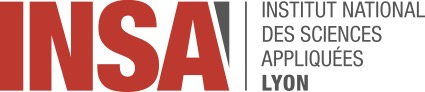
# P2I7: Chapitre 4 méthodes numériques
## Stabilité des schémas numériques pour les EDOs
Camille Carvalho (INSA/ICJ)

In [104]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

# Application
On considère les petits déplacements verticaux des masses reliées par des ressorts représentées sur la figure:

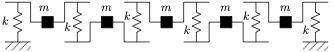
Toutes les masses ont même masse $m$ et tous les ressorts ont m\^eme raideur $k$. En l'absence d'amortissement et de forces extérieures, le principe fondamental de la dynamique amène au système d'équations différentielles suivant:
$$
\begin{aligned}
  & m\ddot{u}_1(t) + k u_1(t) + k(u_1(t)-u_2(t)) = 0, \\
 & m\ddot{u}_2(t) + k (u_2(t)-u_1(t)) + k(u_2(t)-u_3(t)) = 0, \\
 & m\ddot{u}_3(t) + k (u_3(t)-u_2(t)) + k(u_3(t)-u_4(t)) = 0, \\
 & m\ddot{u}_4(t) + k (u_4(t)-u_3(t)) + k(u_4(t)-u_5(t)) = 0, \\
 & m\ddot{u}_5(t) + k (u_5(t)-u_4(t)) + k u_5(t) = 0,
\end{aligned}
$$
où $u_1(t), u_2(t), u_3(t), u_4(t)$ et $u_5(t)$ sont les petits déplacements verticaux des masses par rapport à leur position d'équilibre. Pour simplifier, on prendra $k/m = 1$ dans la suite. Si on introduit la matrice $K$ et le vecteur $U(t)$ suivants :
$$ K = \begin{bmatrix}
 2 & -1 & 0 & 0 & 0 \\
 -1 & 2 & -1 & 0 & 0 \\
 0 & -1 & 2 & -1 & 0 \\
 0 & 0 & -1 & 2 & -1 \\
 0 & 0 & 0 & -1 & 2
\end{bmatrix}, \quad \quad U(t) = \begin{pmatrix} {u_1(t)} \\ {u_2(t)} \\ {u_3(t)}\\ {u_4(t)}\\{u_5(t)} \end{pmatrix} $$
alors ce système peut se récrire
$$ \ddot{U}(t) + KU(t) = 0. $$

**Question 1.** Mettez ce système à l'ordre un sous la forme
  $$  \dot{V}(t) + BV(t) = 0, $$
  où $V(t)$ est un vecteur à 10 composantes et $B$ une matrice $10\times 10$ que vous déterminerez.
  

**Solution.** On réécrit le problème comme un système du premier ordre
$$ {V}' = \begin{bmatrix} U' \\ U'' \end{bmatrix} = - \begin{bmatrix} 0 & -I \\ K & 0\end{bmatrix} V = -BY, \quad {V}(0) = \begin{bmatrix} U(0) \\ U'(0) \end{bmatrix}
$$
soit plus précisément
$$ B = \begin{bmatrix}
 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0  & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0  & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0  & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1  & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  & -1 \\
 2 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 -1 & 2 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & -1 & 2 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & -1 & 2 & -1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & -1 & 2& 0 & 0 & 0 & 0 & 0 
\end{bmatrix}, \quad \quad V(t) = \begin{pmatrix} {u_1(t)} \\ {u_2(t)} \\ {u_3(t)}\\ {u_4(t)}\\{u_5(t)} \\{\dot{u}_1(t)} \\ {\dot{u}_2(t)} \\ {\dot{u}_3(t)}\\ {\dot{u}_4(t)}\\{\dot{u}_5(t)} \end{pmatrix} $$

**Question 2.** Déterminez les valeurs propres de la matrice $B$ à l'aide de Python. Vous pourrez utiliser la commande ``numpy.linalg.eig``. Quelles sont les valeurs du pas de temps $\Delta t$ et du paramètre $\theta$ pour lesquelles le $\theta$-schéma est stable ? 
 

In [105]:
from numpy import linalg as la
B = np.matrix([[0, 0, 0, 0, 0, -1., 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, -1., 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, -1., 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, -1., 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, -1.],
     [2., -1., 0, 0, 0, 0, 0, 0, 0, 0],
     [-1., 2., -1., 0, 0, 0, 0, 0, 0, 0],
     [0, -1., 2., -1., 0, 0, 0, 0, 0, 0],
     [0, 0, -1., 2., -1., 0, 0, 0, 0, 0],
     [0, 0, 0, -1., 2., 0, 0, 0, 0, 0]])
print(B)
λ, v = la.eig(B)
print(λ)

[[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2.  0.  0.  0.  0.  0.]]
[ 5.83962094e-17+1.93185165j  5.83962094e-17-1.93185165j
  0.00000000e+00+1.73205081j  0.00000000e+00-1.73205081j
  8.83080961e-17+1.41421356j  8.83080961e-17-1.41421356j
  1.81238972e-16+1.j          1.81238972e-16-1.j
 -7.20222797e-17+0.51763809j -7.20222797e-17-0.51763809j]


On observe que $\Re(\lambda) \approx 0$ (les valeurs à $10^{-16}$ sont à machine précision nulle), les valeurs propres sont toutes imaginaires pures. Considérons le $\theta$-schéma dans notre cas (voir section 3.3.1), on obtient alors
$$(I_{10} +\Delta t \theta B )V_{i+1} = (I_{10} - \Delta t (1- \theta) B )V_i $$
où $I_{10}$ représente la matrice identité de $\mathbb{R}^{10}$.

D'après le cours, on remarque que, pour $\theta$ choisi, il faut donc choisir $\Delta t$ tel que $\Delta t < \frac{1}{|\lambda|(1-\theta)}$ pour $\lambda$ valeur propre de $B$. On remarque que $|\lambda_\max| \approx 2$, donc on en déduit qu'il faut $\Delta t (1-\theta) < \frac{1}{2}$.


 **Question 3.** Faites un programme Python calculant la solution aux différents pas de temps pour le $\theta$-schéma appliqué au système obtenu pour la condition initiale
$$ u_1(0) = 1, ~~u_2(0) = 1.5588, ~~u_3(0) = 2, ~~u_4(0) = 1.5588, ~~u_5(0) = 1, $$
$$ \dot{u}_1(0) = \dot{u}_2(0) = \dot{u}_3(0) = \dot{u}_4(0) =  \dot{u}_5(0) = 0, $$
et pour un temps de simulation $T = 100$. Vous dessinerez la position des masses à chaque pas de temps. Vous pourrez également dessiner l'évolution de l'énergie totale du système qui s'écrit $\text{diag}\left(\frac{1}{2} \dot{U}^T\dot{U} + \frac{1}{2} U^T K U\right)$. 

Text(0, 0.5, 'E(t)')

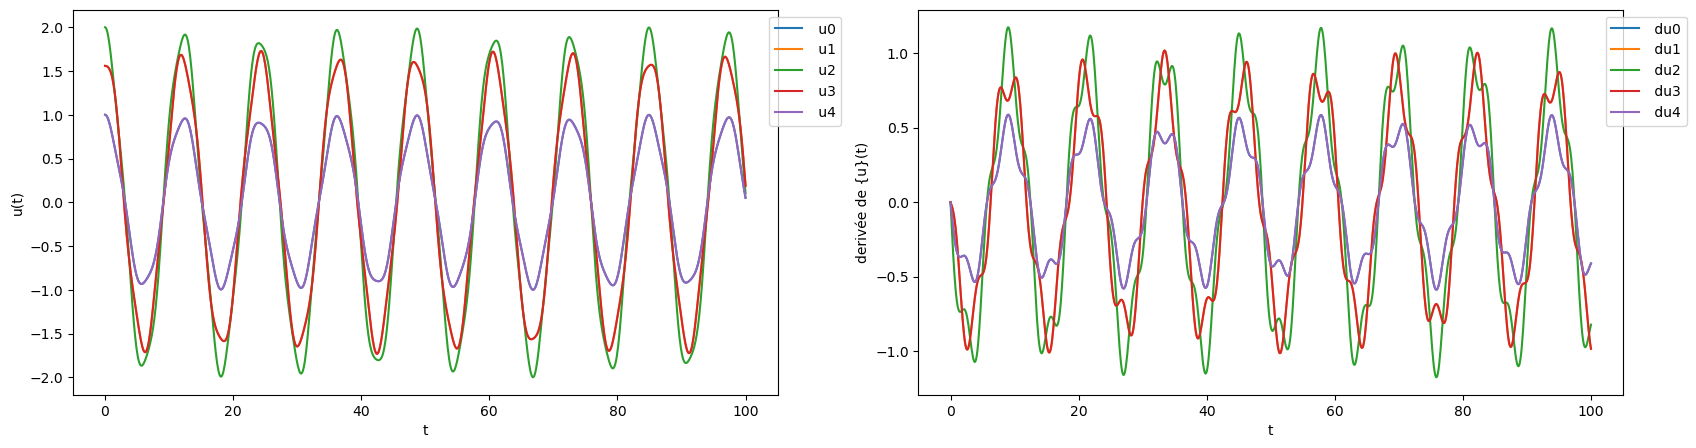

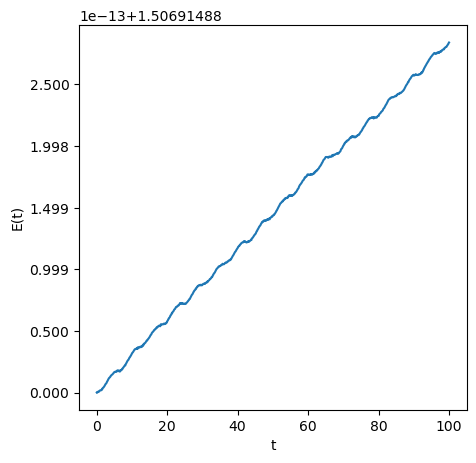

In [106]:
# SOLUTION: 
a = 0
b = 100
N = 1000
θ = 0.5
#V0 = [[1], [1.5588], [2], [1.5588], [1], [0], [0], [0], [0], [0]]
V0 = [1, 1.5588, 2, 1.5588, 1, 0, 0, 0, 0, 0]
K = np.matrix([
     [2., -1., 0, 0, 0],
     [-1., 2., -1., 0, 0],
     [0, -1., 2., -1., 0],
     [0, 0, -1., 2., -1.],
     [0, 0, 0, -1., 2.]])

# Fonction calculant la solution discrète et l'énergie discrète
def theta_schema(B, K, a, b, V0, N, θ):
    '''
    function that approximate the initial value problem (IVP) v'= -Bv
    a < t < b, v(a) = V0, using a θ-schema
    
    Parameters
    ==========
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution v, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded
    v = np.zeros((10, N+1))  
    v[:, 0] = V0 # V0 est un vecteur de taille 10 contenant les valeurs initiales
    C = np.eye(10) + Δt * θ * B
    D = np.eye(10) - Δt * (1. - θ) * B
    inv_CD = la.inv(C)*D
    Energie = lambda v, i :  (0.5 * np.dot(v[5:,i], v[5:,i])+ 0.5 * np.dot(v[0:5,i],(K*v[0:5,i:i+1])))[0,0]
    E = np.zeros(N+1) 
    E[0] = Energie(v,0)
    for i in range(1, N+1):
        v[:, i:i+1] = inv_CD*v[:, i-1:i] 
        E[i] = Energie(v, i)
        
    return t, v, E

# comparison approximation and exact solution
t, v, E = theta_schema(B, K, a, b, V0, N, θ)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
for i in range(0,5):
    ax1.plot(t, v[i, :], label = f' u{i}')
    ax2.plot(t, v[i+5, :], label = f' du{i}')

ax1.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
ax1.set_xlabel('t')
ax1.set_ylabel('u(t)')
ax2.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
ax2.set_xlabel('t')
ax2.set_ylabel('derivée de {u}(t)')

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.plot(t, E, label = f' Energie')
ax1.set_xlabel('t')
ax1.set_ylabel('E(t)')

Voici un exemple de graph interactif avec la commande `interact`. Cela vous permet de tester directement différentes valeurs du $\theta$-schéma et du pas de temps ($N$). A vous de le modifier pour respecter la condition de stabilité obtenue !

In [108]:
from ipywidgets import interact

@interact
def interact_plot(θ=(0, 1, 0.1), N=(100, 100000, 100)):
    t, v, E = theta_schema(B, K, a, b, V0, N, θ)
    Δt = (b-a)/N
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    for i in range(0,5):
        ax1.plot(t, v[i, :], label = f' u{i}')
        ax2.plot(t, v[i+4, :], label = f' du{i}')

    #compute stability constant
    λ, v = la.eig(B)
    a_l = (1 - Δt*λ*(1-θ))/(1 + Δt*λ*θ)
    a_max  = np.max(np.abs(a_l))
    
    ax1.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
    ax1.set_xlabel('t')
    ax1.set_ylabel('u(t)')
    ax2.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
    ax2.set_xlabel('t')
    ax2.set_ylabel('derivée de {u}(t)')
    plt.title(f'stability constant = {a_max}')
    fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
    ax1.plot(t, E, label = f' Energie')
    ax1.set_xlabel('t')
    ax1.set_ylabel('E(t)')
    

interactive(children=(FloatSlider(value=0.0, description='θ', max=1.0), IntSlider(value=50000, description='N'…

**Question 4.** Testez la méthode d'Euler explicite ($\theta = 0$). Décrivez comment se traduit le caractère instable du schéma numérique.

In [7]:
#tester avec le programme ci-dessus

**Question 5.** Testez la méthode d'Euler implicite ($\theta = 1$). Quel est le pas de temps nécessaire pour que la solution ne perde pas d'énergie (visuellement) au bout de deux périodes ?

In [8]:
#tester avec le programme ci-dessus

**Question 6.** Testez la méthode de Crank-Nicolson ($\theta = 1/2$). Comparez aux valeurs de $\theta$ précédentes.

In [9]:
#tester avec le programme ci-dessus